In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [91]:
data_raw = pd.read_csv('./data/svm/watermelon_3a.csv')
data_raw.head()

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是


In [92]:
data = data_raw.copy()
data.drop(columns=["编号"], axis=1, inplace=True)
cate_dict = {'是':0, '否':1}
data['好瓜'] = pd.factorize(data['好瓜'])[0]
data_dummies = pd.get_dummies(data.iloc[:, :6])
data = pd.concat([data_dummies, data.iloc[:, 6:]], axis=1)
data.head(10)

,色泽_乌黑,色泽_浅白,色泽_青绿,根蒂_硬挺,根蒂_稍蜷,根蒂_蜷缩,敲声_沉闷,敲声_浊响,敲声_清脆,纹理_模糊,纹理_清晰,纹理_稍糊,脐部_凹陷,脐部_平坦,脐部_稍凹,触感_硬滑,触感_软粘,密度,含糖率,好瓜
0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0.697,0.460,0
1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0.774,0.376,0
2,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0.634,0.264,0
3,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0.608,0.318,0
4,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0.556,0.215,0
5,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0.403,0.237,0
6,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0.481,0.149,0
7,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0.437,0.211,0
8,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0.666,0.091,1
9,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0.243,0.267,1


In [93]:
train_set, test_set = train_test_split(data, test_size=0.3)

In [94]:
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_linear.fit(train_set.iloc[:, :-1], train_set.iloc[:, -1])
svm_rbf.fit(train_set.iloc[:, :-1], train_set.iloc[:, -1])

SVC()

In [95]:
result_linear = svm_linear.predict(test_set.iloc[:, :-1])
result_rbf = svm_rbf.predict(test_set.iloc[:, :-1])

In [96]:
acc_linear = (result_linear == test_set.iloc[:, -1].values).sum() / len(test_set)
acc_rbf = (result_rbf == test_set.iloc[:, -1].values).sum() / len(test_set)
acc_linear, acc_rbf

(0.6666666666666666, 0.6666666666666666)

In [ ]:
svm_linear.support_vectors_, svm_rbf.support_vectors_

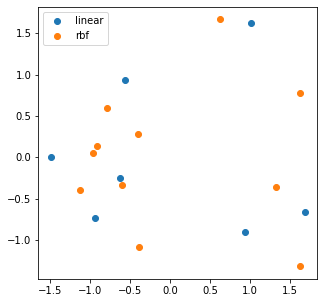

In [98]:
from sklearn.decomposition import PCA
linear_main = PCA(2).fit_transform(svm_linear.support_vectors_)
rbf_main = PCA(2).fit_transform(svm_rbf.support_vectors_)
plt.figure(figsize=(5, 5))
plt.scatter(linear_main[:, 0], linear_main[:, 1], label='linear')
plt.scatter(rbf_main[:, 0], rbf_main[:, 1], label='rbf')
plt.legend()
plt.show()

In [106]:
data_sub = data_raw.iloc[:, -3:].copy()
data_sub['好瓜'] = pd.factorize(data_sub['好瓜'])[0]
X, Y = data_sub.values[:, :-1], data_sub.values[:, -1]
data_sub.head()

,密度,含糖率,好瓜
0,0.697,0.460,0
1,0.774,0.376,0
2,0.634,0.264,0
3,0.608,0.318,0
4,0.556,0.215,0


In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [108]:
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_linear.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)

SVC()

In [109]:
pred_linear = svm_linear.predict(x_test)
pred_rbf = svm_rbf.predict(x_test)

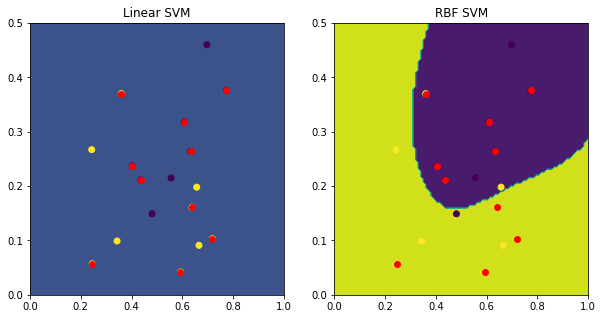

In [111]:
x, y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 0.5, 100))
sampels = np.concatenate([x.reshape(1, -1), y.reshape(1, -1)], axis=0).T
predicts_linear = svm_linear.predict(sampels)
predicts_rbf = svm_rbf.predict(sampels)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Linear SVM')
plt.contourf(x, y, predicts_linear.reshape(100, -1))
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1], marker='o', c='r')

plt.subplot(1, 2, 2)
plt.title('RBF SVM')
plt.contourf(x, y, predicts_rbf.reshape(100, -1))
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1], marker='o', c='r')
plt.show()